

-- New Fold --
Train, test and validation arrays normalized to:
[1.], [1.0006], [0.9997]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (21285, 8, 4) 
Shape of train set: (72369, 8, 4) 
Shape of validation set: (12771, 8, 4) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.2, 0.21, 0.16] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.573, loss_val=1.572, train=35.2%, val=35.3%
End of epoch 3: loss_tr=1.413, loss_val=1.411, train=44.4%, val=45.1%
End of epoch 5: loss_tr=1.335, loss_val=1.332, train=46.4%, val=47.2%
End of epoch 7: loss_tr=1.291, loss_val=1.286, train=47.7%, val=48.5%
End of epoch 9: loss_tr=1.265, loss_val=1.258, train=47.8%, val=48.4%
End of epoch 11: loss_tr=1.224, loss_val=1.219, train=50.1%, val=50.6%
End of

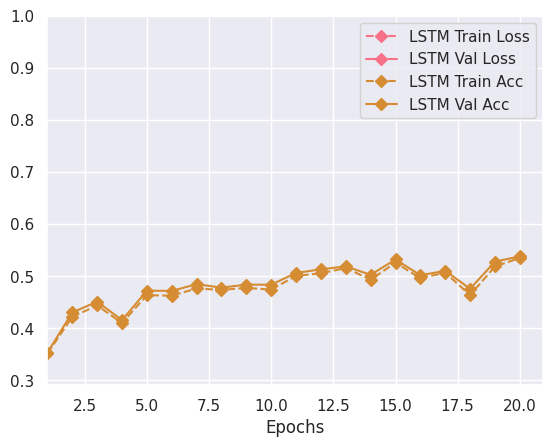

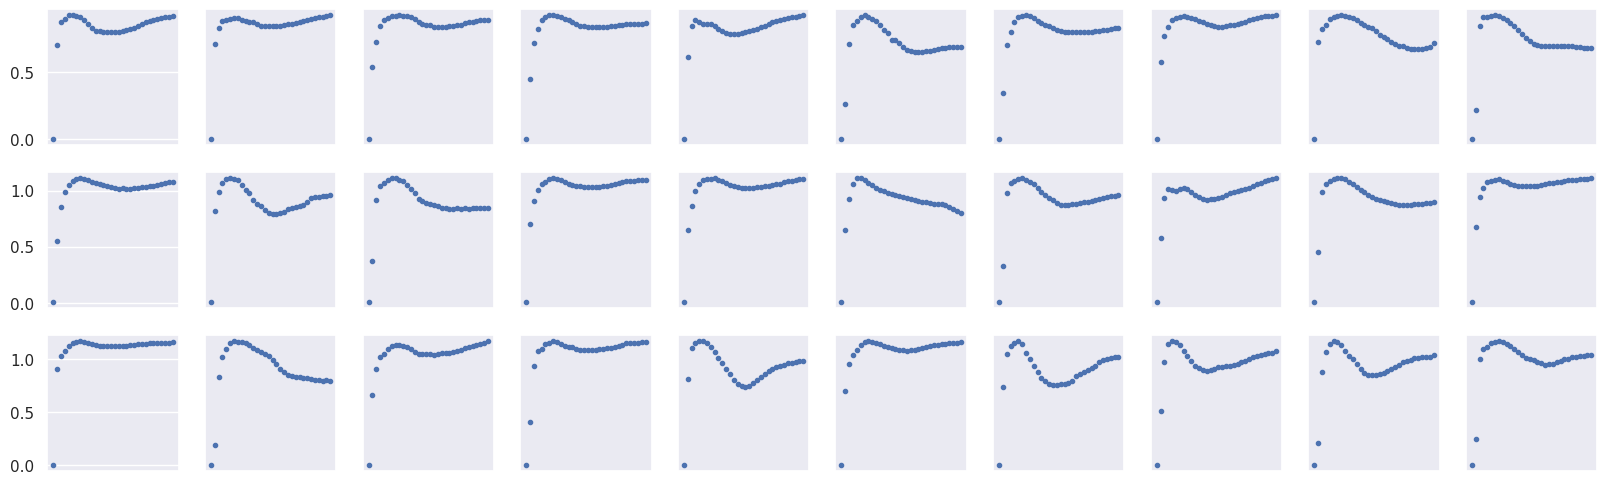

In [5]:
# Routine implemented in peratouch.routines
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import LSTM 
from peratouch.config import path_five_users_main 
from peratouch.data import load_data

input_size = 4 
n_batches = 15
Xraw, yraw = load_data(path_five_users_main)
D = Data(Xraw, yraw)
D.shuffle()
D.make_folds(5)
D.next_fold()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = LSTM(input_size, hidden_size=4*input_size) 
T = Trainer(D)
T.setup(model, batch_size=int(len(D.xtr)/n_batches), max_epochs=20)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

Train, test and validation arrays normalized to:
[1.], [0.9991], [1.0021]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (10642, 8, 4) 
Shape of train set: (85140, 8, 4) 
Shape of validation set: (10643, 8, 4) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.22, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.550, loss_val=1.548, train=39.1%, val=40.0%
End of epoch 3: loss_tr=1.296, loss_val=1.283, train=47.2%, val=47.6%
End of epoch 5: loss_tr=1.170, loss_val=1.155, train=53.1%, val=53.8%
End of epoch 7: loss_tr=1.225, loss_val=1.205, train=49.1%, val=49.2%
End of epoch 9: loss_tr=1.066, loss_val=1.050, train=57.5%, val=58.3%
End of epoch 11: loss_tr=1.072, loss_val=1.060, train=57.8%, val=58.5%
End of epoch 13: loss_tr=1.033, loss_val=1.018, tr

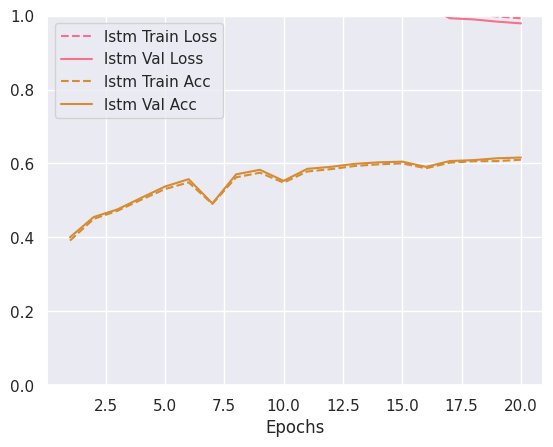

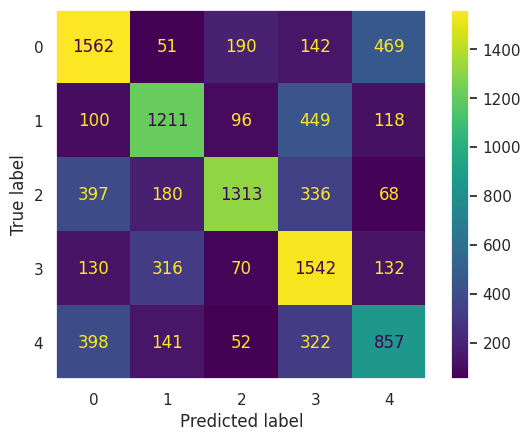

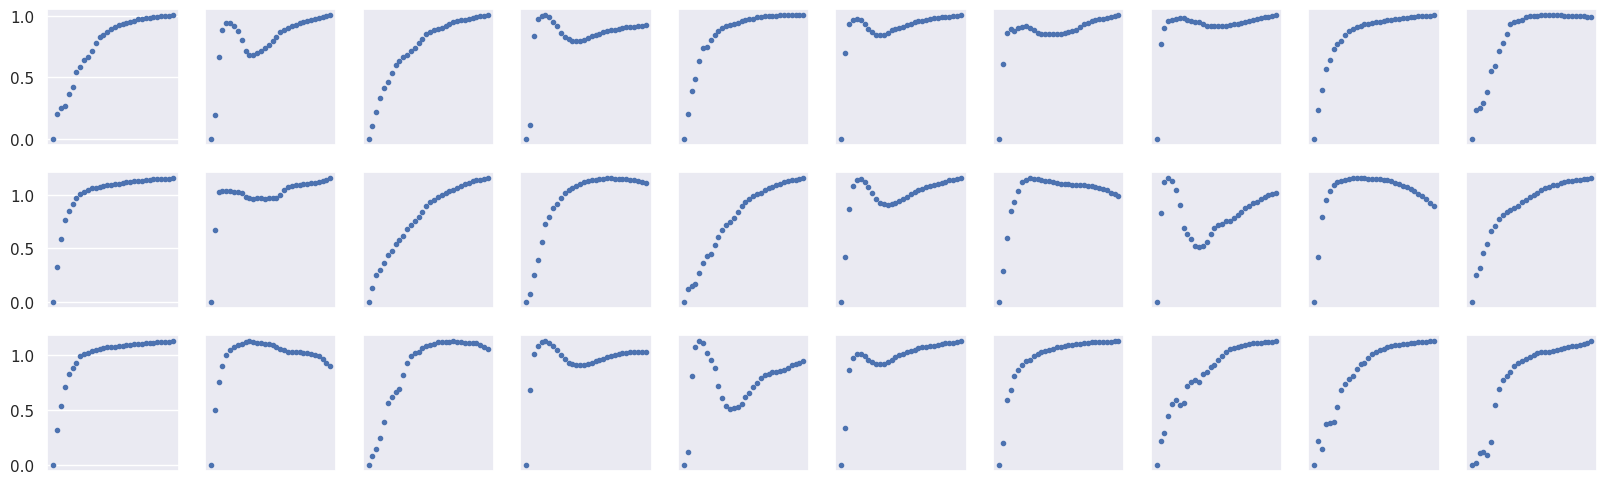

In [1]:
# Old routine (has not been updated)
# A notebook for simple lstm exploration
# Case of single lstm cell
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import lstm
from peratouch.config import path_five_users_main 

input_size = 4 
D = Data(path_five_users_main, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = lstm(input_size, hidden_size=4*input_size) 
T = Trainer(D)
T.setup(model, batch_size=5000, max_epochs=20)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9997 0.9999 1.0014], [0.9995 1.0002 1.0009]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106410, 3, 32) 
Labels shape:  (106410,) 
Shape of test set: (10641, 3, 32) 
Shape of train set: (85128, 3, 32) 
Shape of validation set: (10641, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.21, 0.21, 0.16] 
Fraction of validation labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.561, loss_val=1.553, train=30.8%, val=30.4%
End of epoch 3: loss_tr=1.148, loss_val=1.141, train=51.9%, val=52.9%
End of epoch 5: loss_tr=1.140, loss_val=1.133, train=52.2%, val=53.1%
End of epoch 7: loss_tr=1.041, loss_val=1.033, train=58.2%, val=58.7%
End of epoch 9: loss_tr=1.036, loss_val=1.027, train=56.6%, val=57.6%
End of epoch 11: loss_tr=0.991, loss_val=0.986, train=60.6%, val=60.7%
End of epoch 

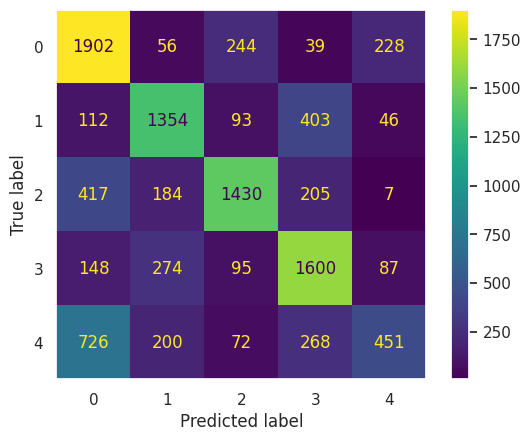

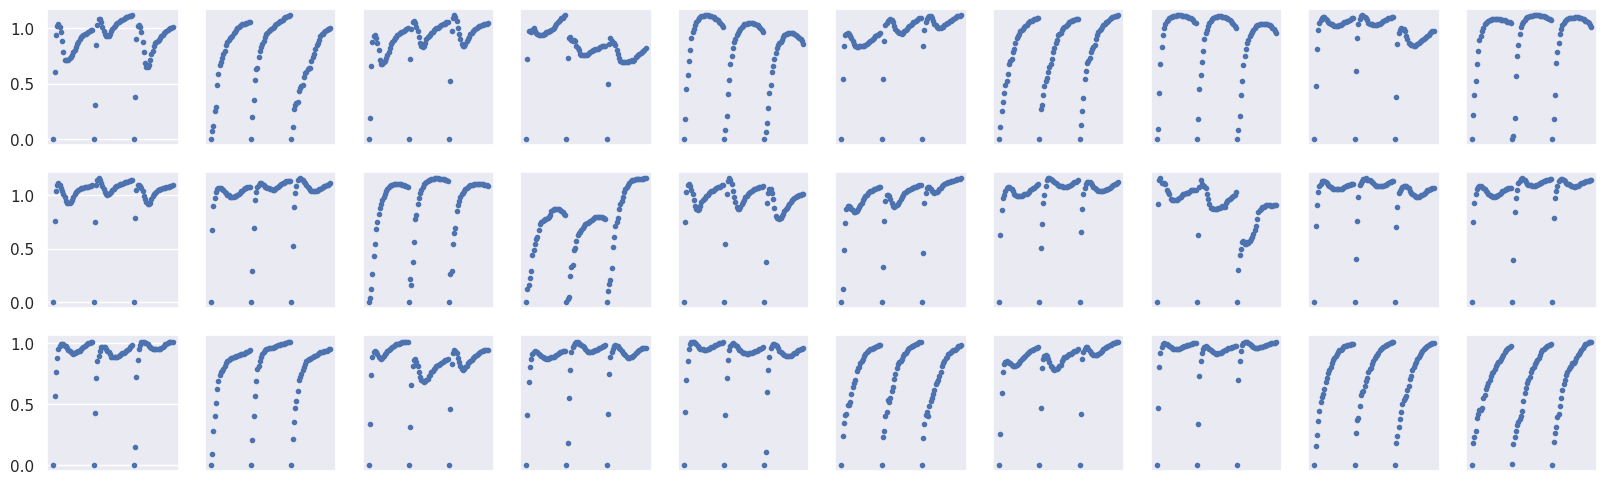

In [2]:
# Look at 3 triggers
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import lstm
from peratouch.config import path_five_users_main 

input_size = 32 
D = Data(path_five_users_main, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = lstm(input_size, hidden_size=int(input_size/2)) 
T = Trainer(D)
T.setup(model, batch_size=5000, max_epochs=20)
T.train_model(model)

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()